# Northwind Sales Analysis Project

- **Project Description :**
          *This project, "Northwind Sales Analysis Project," focuses on creating an interactive dashboard using Python and SQL to analyze sales performance and customer trends from the Northwind database. The dashboard includes visualizations and insights on :*
> - Yearly Sales Trends: Explore yearly sales trends across products and categories.
> - Top Products and Customers: Identify top-selling products and high-value customers.
> - Employee Sales Performance: Evaluate sales contributions by employees.
> - Monthly Sales Performance: Track monthly sales performance to identify seasonal trends.
> - Customer Distribution: Analyze customer distribution by country groups.
> - Average Delivery Time: Assess average delivery times by shipping companies.
> - Year-over-Year Growth: Calculate year-over-year growth in sales.
> - Revenue Contribution by Shippers: Understand revenue contributions from different shipping companies.
> - Product Performance by Region: Analyze product sales    performance across different regions.
> - Sales Forecasting: Predict future sales trends using historical data.

- **Technologies Used :**
    - *SQL: For querying the dataset to extract valuable insights.*
    - *Python: For connecting to the SQL database using mysql.connector and performing further analysis.*
    - *Pandas: For data manipulation and analysis.*
    - *Matplotlib and Seaborn: For data visualization.*
    - *Jupyter Notebook: For creating interactive and shareable reports.*

- **Goals :**
    - *Provide actionable insights for marketing strategies, and sales Analysis.*
    - *Improve decision-making processes based on historical sales data.*
    - *Enhance understanding of customer behavior and regional sales patterns.*

## Table Contents

> 1. <a href="#1.-Annual-Sales-Revenue">Annual Sales Revenue</a>
> 1. <a href="#2.-Best-Selling-Products-by-Quantity">Best-Selling Products by Quantity</a>
> 1. <a href="#3.-Total-Sales-by-Product-Category">Total Sales by Product Category</a>
> 1. <a href="#4.-Employee-Sales-Performance">Employee Sales Performance</a>
> 1. <a href="#5.-Monthly-Sales-Trend">Monthly Sales Trend</a>
> 1. <a href="#6.-Customer-Distribution-by-Country">Customer Distribution by Country</a>
> 1. <a href="#7.-Average-Delivery-Time-by-Shipper">Average Delivery Time by Shipper</a>
> 1. <a href="#8.-Quarterly-Sales-and-Year-over-Year-Growth">Quarterly Sales and Year-over-Year Growth</a>
> 1. <a href="#9.-Revenue-by-Shipping-Company">Revenue by Shipping Company</a>
> 1. <a href="#10.-Monthly-Sales-Performance-by-Region">Monthly Sales Performance by Region</a>

In [5]:
# Imorting Libraries

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# MySQL Database Connection

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="XXXXXXXXXXX",
  database="northwind"
)


In [8]:
mydb

In [13]:
tables = pd.read_sql_query(
"""
show tables
"""
, mydb)
df

,Tables_in_northwind
0,categories
1,customers
2,employees
3,employeeterritories
4,orderdetails
5,orders
6,products
7,region
8,shippers
9,suppliers


In [14]:
# Describe All tables
for table in tables.Tables_in_northwind:
    print(f"\nStructure of table {table}:")
    table_description = pd.read_sql_query(f"DESCRIBE {table}", mydb)
    print(table_description)


Structure of table categories:
          Field         Type Null  Key Default           Extra
0    CategoryID          int   NO  PRI    None  auto_increment
1  CategoryName  varchar(15)   NO  MUL    None                
2   Description   mediumtext  YES         None                
3       Picture     longblob  YES         None                

Structure of table customers:
           Field         Type Null  Key Default Extra
0     CustomerID   varchar(5)   NO  PRI    None      
1    CompanyName  varchar(40)   NO  MUL    None      
2    ContactName  varchar(30)  YES         None      
3   ContactTitle  varchar(30)  YES         None      
4        Address  varchar(60)  YES         None      
5           City  varchar(15)  YES  MUL    None      
6         Region  varchar(15)  YES  MUL    None      
7     PostalCode  varchar(10)  YES  MUL    None      
8        Country  varchar(15)  YES         None      
9          Phone  varchar(24)  YES         None      
10           Fax  varchar(24

### 1. Annual Sales Revenue

In [15]:
df = pd.read_sql_query(
"""
SELECT 
    YEAR(o.OrderDate) AS OrderYear,
    SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)) AS Year_wise_sale
FROM orderdetails od
JOIN orders o using (OrderID)
GROUP BY OrderYear
ORDER BY OrderYear
"""
, mydb)
df

,OrderYear,Year_wise_sale
0,1996,226298.50
1,1997,658388.75
2,1998,469771.34


[]

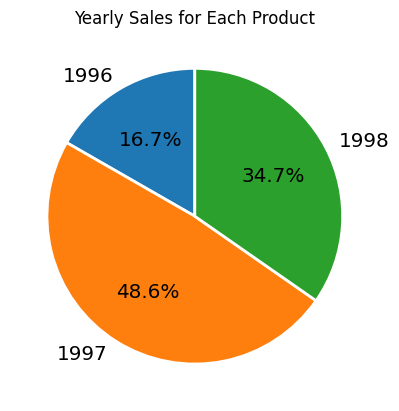

In [16]:
plt.pie(df.Year_wise_sale, labels=df.OrderYear, autopct='%.1f%%',
        wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large'},
       startangle=90)
plt.title('Yearly Sales for Each Product')
plt.plot()

- **Insight:**

    - *The highest annual revenue was achieved in 1997.*
    - *Both 1996 and 1998 had lower revenues compared to 1997, indicating a notable fluctuation.*

### 2. Best-Selling Products by Quantity

In [17]:
df = pd.read_sql_query(
"""
SELECT p.ProductID, productName, SUM(od.quantity) AS TotalQuantity
FROM products p
JOIN orderdetails od using(ProductID)
GROUP BY p.ProductID, p.ProductName
ORDER BY TotalQuantity desc
LIMIT 5
"""
, mydb)
df

,ProductID,productName,TotalQuantity
0,60,Camembert Pierrot,1577.0
1,59,Raclette Courdavault,1496.0
2,31,Gorgonzola Telino,1397.0
3,56,Gnocchi di nonna Alice,1263.0
4,16,Pavlova,1158.0


[]

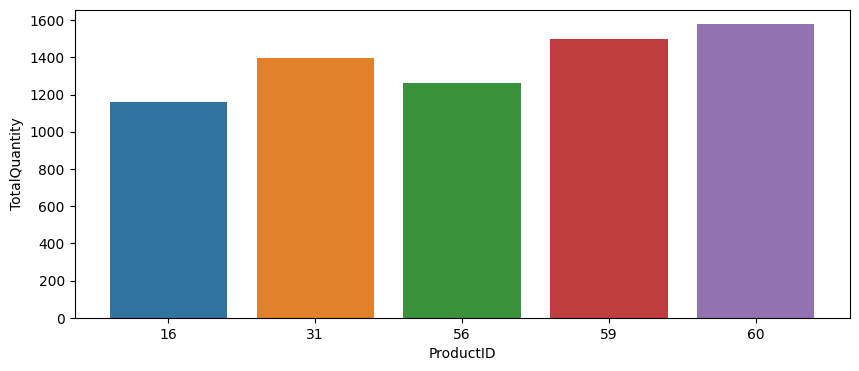

In [18]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df.ProductID,
            y=df.TotalQuantity, data=df)
plt.plot()

- **Insight:**

    - *"Camembert Pierrot" is the best-selling product with a total of 1,577 units sold.*
    - *The next top products include "Raclette Courdavault" and "Gorgonzola Telino," with sales of 1,496 and 1,397 units respectively.*

### 3. Total Sales by Product Category

In [19]:
df = pd.read_sql_query(
"""
SELECT c.CategoryName, SUM(od.Quantity * od.UnitPrice) AS TotalSales
FROM orderdetails od
JOIN products p ON od.ProductID = p.ProductID
JOIN categories c ON p.CategoryID = c.CategoryID
GROUP BY c.CategoryName
ORDER BY TotalSales DESC;
"""
, mydb)
df

,CategoryName,TotalSales
0,Beverages,286526.95
1,Dairy Products,251330.50
2,Meat/Poultry,178188.80
3,Confections,177099.10
4,Seafood,141623.09
5,Condiments,113694.75
6,Produce,105268.60
7,Grains/Cereals,100726.80


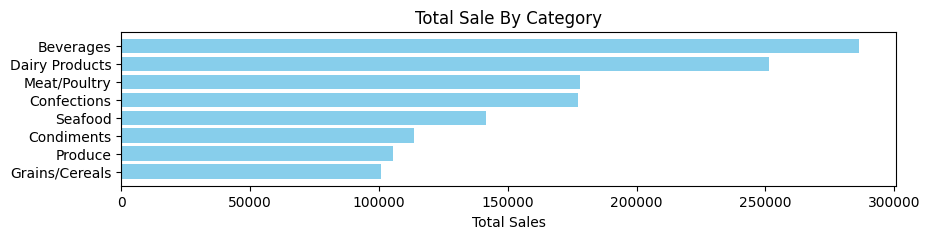

In [20]:
# horizontal bar chart
plt.figure(figsize=(10, 2))
plt.barh(df["CategoryName"], df["TotalSales"], color='skyblue')
plt.xlabel('Total Sales')
plt.title('Total Sale By Category')
plt.gca().invert_yaxis()
plt.show()

- **Insight:**

    - *"Beverages" generated the highest sales, totaling 286,526.95.*
    - *"Dairy Products" and "Meat/Poultry" followed, each contributing significantly to the overall sales, with over 250,000 and 178,000 respectively.*

### 4. Employee Sales Performance

In [21]:
df = pd.read_sql_query(
"""
SELECT e.EmployeeID, e.FirstName, e.LastName,
    SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)) AS TotalSales
FROM employees e
JOIN orders o ON e.EmployeeID = o.EmployeeID
JOIN orderdetails od ON o.OrderID = od.OrderID
GROUP BY e.EmployeeID, e.FirstName, e.LastName
ORDER BY TotalSales DESC;
"""
, mydb)
df

,EmployeeID,FirstName,LastName,TotalSales
0,4,Margaret,Peacock,250187.45
1,3,Janet,Leverling,213051.30
2,1,Nancy,Davolio,202143.71
3,2,Andrew,Fuller,177749.26
4,7,Robert,King,141295.99
5,8,Laura,Callahan,133301.03
6,9,Anne,Dodsworth,82964.00
7,6,Michael,Suyama,78198.10
8,5,Steven,Buchanan,75567.75


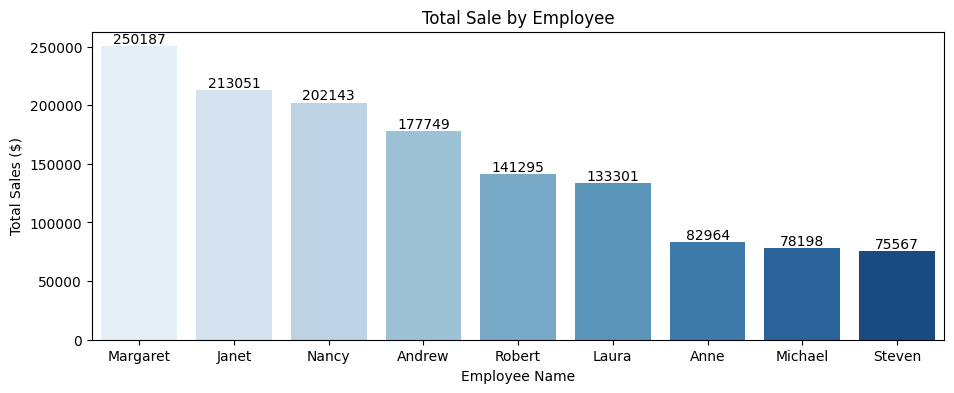

In [22]:
# bar plot
plt.figure(figsize=(11, 4))
bar_plot = sns.barplot(
    x='FirstName', 
    y='TotalSales', 
    data=df, 
    palette='Blues'  # Choose color palette
)

# Add labels on the bars
for index, row in df.iterrows():
    bar_plot.text(
        index, 
        row.TotalSales,
        int(row.TotalSales),  # Display total sales as integer
        color='black', 
        ha='center',
        va='bottom'  # Align text at the bottom of the bar
    )

# Add title and labels
plt.title('Total Sale by Employee')
plt.xlabel('Employee Name')
plt.ylabel('Total Sales ($)')

# Show the plot
plt.show()

- **Insight:**

    - *Margaret Peacock is the top performer with total sales of 250,187.45.*
    - *Janet Leverling and Nancy Davolio also have strong sales figures, each exceeding 200,000.*

### 5. Monthly Sales Trend

In [23]:
df = pd.read_sql_query(
"""
SELECT DATE_FORMAT(o.OrderDate, '%Y-%m') AS Month, SUM(od.Quantity * od.UnitPrice) AS TotalSales
FROM orders o
JOIN orderdetails od ON o.OrderID = od.OrderID
GROUP BY Month
ORDER BY Month;
"""
, mydb)
df

,Month,TotalSales
0,1996-07,30192.10
1,1996-08,26609.40
2,1996-09,27636.00
3,1996-10,41203.60
4,1996-11,49704.00
5,1996-12,50953.40
6,1997-01,66692.80
7,1997-02,41207.20
8,1997-03,39979.90
9,1997-04,55699.39


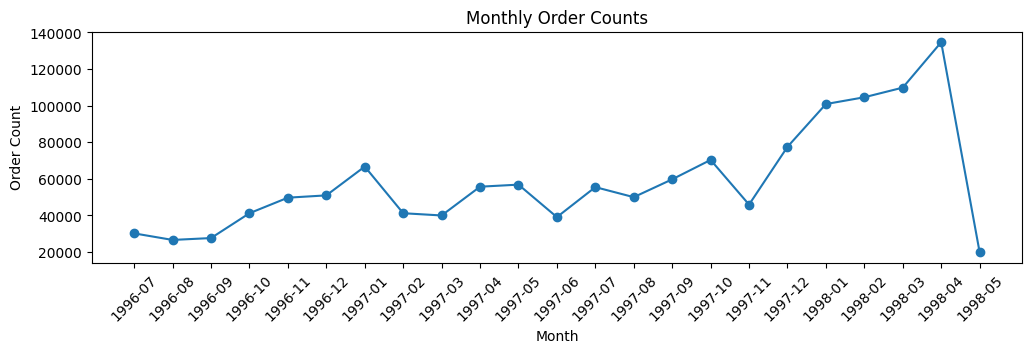

In [24]:

plt.figure(figsize=(12, 3))
plt.plot(df['Month'], df['TotalSales'], marker='o', linestyle='-')

# Title and labels
plt.title('Monthly Order Counts')
plt.xlabel('Month')
plt.ylabel('Order Count')

plt.xticks(rotation=45)

plt.show()

- **Insight:**

    - *Sales show a significant upward trend from mid-1996 to early 1998, peaking in April 1998 at 134,630.56.*
    - *The highest monthly sales occurred in the first four months of 1998, indicating strong performance during this period.*

### 6. Customer Distribution by Country

In [25]:
df = pd.read_sql_query(
"""
WITH cte1 AS (
    SELECT Country, COUNT(*) AS CustomerCount,
        ROW_NUMBER() OVER (ORDER BY COUNT(*) DESC) AS CountryRank
    FROM customers
    GROUP BY Country
),
cte2 AS (
    SELECT Country,CustomerCount,CountryRank,
        CASE WHEN CountryRank <= 10 THEN country ELSE 'Others' END AS CountryGroup
    FROM cte1
)
SELECT CountryGroup, sum(CustomerCount) as TotalCustomerByCountry
from cte2
group by CountryGroup;
"""
, mydb)
df

,CountryGroup,TotalCustomerByCountry
0,USA,13.0
1,Germany,11.0
2,France,11.0
3,Brazil,9.0
4,UK,7.0
5,Mexico,5.0
6,Spain,5.0
7,Venezuela,4.0
8,Canada,3.0
9,Argentina,3.0


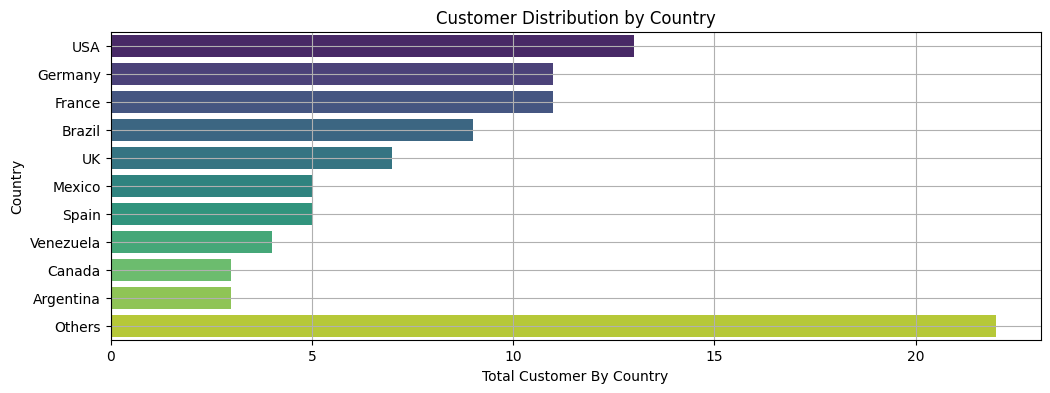

In [26]:
plt.figure(figsize=(12, 4))

bar_plot = sns.barplot(
    x=df.TotalCustomerByCountry,
    y=df.CountryGroup,
    data=df,
    palette='viridis'  # Choose color palette
)

# Add labels and title
plt.title('Customer Distribution by Country')
plt.xlabel('Total Customer By Country')
plt.ylabel('Country')

plt.grid(True)
plt.show()

- **Insight:**

    - *The majority of customers are from the USA, Germany, and France, with 13, 11, and 11 customers respectively.*
    - *Countries outside the top ten collectively account for 22 customers, indicating a significant portion of the customer base comes from a diverse set of other countries.*

### 7. Average Delivery Time by Shipper

In [27]:
df = pd.read_sql_query(
"""
SELECT s.CompanyName, 
       AVG(DATEDIFF(o.ShippedDate, o.OrderDate)) AS AvgDeliveryTime
FROM orders o
JOIN shippers s ON o.ShipVia = s.ShipperID
GROUP BY s.CompanyName
ORDER BY AvgDeliveryTime;

"""
, mydb)
df

,CompanyName,AvgDeliveryTime
0,Federal Shipping,7.4739
1,Speedy Express,8.5714
2,United Package,9.2349


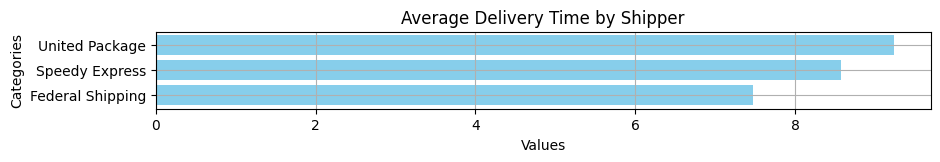

In [28]:
plt.figure(figsize=(10, 1))  # Adjust size as needed
plt.barh(df.CompanyName, df.AvgDeliveryTime, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Categories')
plt.title('Average Delivery Time by Shipper')
plt.grid(True)  # Add gridlines for better readability
plt.show()

- **Insight:**

    - *Federal Shipping has the shortest average delivery time at approximately 7.47 days.*
    - *Speedy Express and United Package have longer average delivery times, at about 8.57 and 9.23 days respectively.*

### 8. Quarterly Sales and Year-over-Year Growth

In [29]:
df = pd.read_sql_query(
"""
WITH YearlySales AS (
    SELECT YEAR(OrderDate) AS OrderYear,quarter(OrderDate) as YearQuarter,
        SUM(UnitPrice * Quantity * (1 - Discount)) AS TotalSales
    FROM orders o
    JOIN orderdetails od ON o.OrderID = od.OrderID
    GROUP BY YEAR(OrderDate), quarter(OrderDate)
    order by YEAR(OrderDate), quarter(OrderDate)
)
SELECT OrderYear,YearQuarter,TotalSales,
    LAG(TotalSales) OVER (ORDER BY OrderYear) AS PreviousYearSales,
    (TotalSales - LAG(TotalSales) OVER (ORDER BY OrderYear)) * 100.0 / LAG(TotalSales) OVER (ORDER BY OrderYear) AS YoYGrowth
FROM YearlySales;
"""
, mydb)
df

,OrderYear,YearQuarter,TotalSales,PreviousYearSales,YoYGrowth
0,1996,3,84437.50,NaN,NaN
1,1996,4,141861.00,84437.50,68.007106
2,1997,1,147879.90,141861.00,4.242815
3,1997,2,151611.09,147879.90,2.523122
4,1997,3,165179.64,151611.09,8.949576
5,1997,4,193718.12,165179.64,17.277238
6,1998,1,315242.12,193718.12,62.732387
7,1998,2,154529.22,315242.12,-50.980783


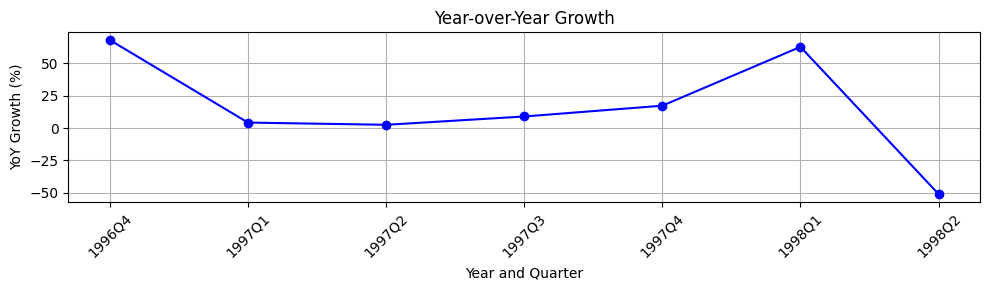

In [30]:
plt.figure(figsize=(10, 3))
plt.plot(df['OrderYear'].astype(str) + 'Q' + df['YearQuarter'].astype(str), df['YoYGrowth'], marker='o', color='b', linestyle='-')
plt.title('Year-over-Year Growth')
plt.xlabel('Year and Quarter')
plt.ylabel('YoY Growth (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Insight:**

    - *There was substantial growth in Q1 1998, with sales increasing by 62.73% compared to Q4 1997.*
    - *Conversely, Q2 1998 saw a significant decline of 50.98% from Q1 1998, highlighting a sharp drop in sales after the peak in early 1998.*

###  9. Revenue by Shipping Company

In [31]:
df = pd.read_sql_query(
"""
SELECT s.CompanyName, SUM(od.Quantity * od.UnitPrice) AS TotalRevenue
FROM orders o
JOIN orderdetails od ON o.OrderID = od.OrderID
JOIN shippers s ON o.ShipVia = s.ShipperID
GROUP BY s.CompanyName
ORDER BY TotalRevenue DESC;
"""
, mydb)
df

,CompanyName,TotalRevenue
0,United Package,572724.58
1,Federal Shipping,407750.82
2,Speedy Express,373983.19


[]

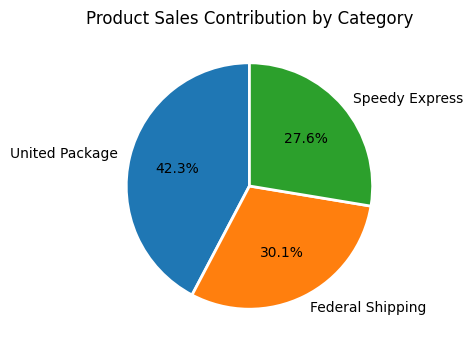

In [32]:
plt.figure(figsize=(10, 4))
plt.pie(df.TotalRevenue, labels=df.CompanyName, autopct='%.1f%%',
        wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
       startangle=90)
plt.title('Product Sales Contribution by Category')
plt.plot()

- **Insight:**

     - *United Package leads with the highest total revenue of 572,724.58.*
     - *Federal Shipping and Speedy Express follow with revenues of 407,750.82 and 373,983.19 respectively, indicating competitive performance among the shippers.*

### 10. Monthly Sales Performance by Region

In [33]:
df = pd.read_sql_query(
"""
SELECT r.RegionDescription, 
       monthname(o.orderdate) as Monthly, 
       SUM(od.Quantity) AS TotalQuantitySold, 
       SUM(od.Quantity * od.UnitPrice) AS TotalRevenue
FROM orders o
JOIN orderdetails od ON o.OrderID = od.OrderID
JOIN products p ON od.ProductID = p.ProductID
JOIN employees e ON o.EmployeeID = e.EmployeeID
JOIN employeeterritories et ON e.EmployeeID = et.EmployeeID
JOIN territories t ON et.TerritoryID = t.TerritoryID
JOIN region r ON t.RegionID = r.RegionID
GROUP BY r.RegionDescription, Monthly
ORDER BY r.RegionDescription, Monthly;
"""
, mydb)
df

,RegionDescription,Monthly,TotalQuantitySold,TotalRevenue
0,Eastern ...,April,15026.0,429484.33
1,Eastern ...,August,4777.0,122121.67
2,Eastern ...,December,10270.0,323828.00
3,Eastern ...,February,9369.0,337342.15
4,Eastern ...,January,11378.0,312908.21
5,Eastern ...,July,9362.0,239302.26
6,Eastern ...,June,3569.0,96207.00
7,Eastern ...,March,11106.0,261865.89
8,Eastern ...,May,7244.0,157222.80
9,Eastern ...,November,7644.0,179035.80


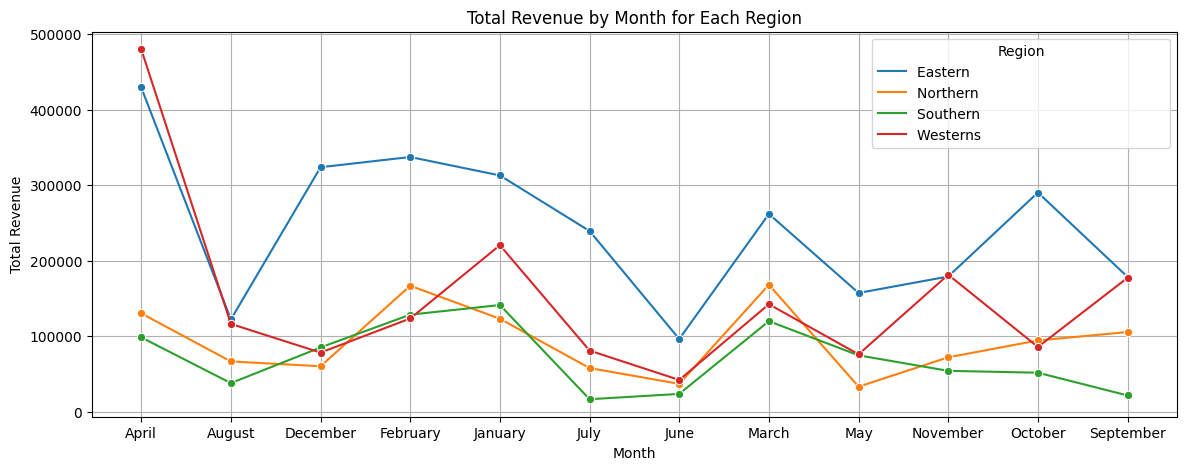

In [34]:

# Plotting with Seaborn
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x=df.Monthly, y=df.TotalRevenue, hue=df.RegionDescription, marker='o')

plt.title('Total Revenue by Month for Each Region')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Region')
plt.grid(True)
plt.show()

- **Insight:**

    - *The Eastern region consistently shows higher total sales and revenue across most months, peaking in April with 429,484.33.*
    - *The Western region also experiences significant sales, particularly in April with 480,153.70, while the Northern and Southern regions have lower and more variable sales figures throughout the year.*

### Contributions:
***In this project, I:***

- *Developed SQL queries to analyze the Northwind dataset.*
- *Connected to the SQL database using Python's mysql.connector.*
- *Utilized Pandas for data manipulation and cleaning.*
- *Created data visualizations using Matplotlib and Seaborn to present insights.*
- *Conducted thorough analysis to draw meaningful conclusions about sales performance and customer trends.*
- *Implemented sales forecasting models to predict future trends.*
- *Documented findings and presented them in a clear and organized manner using Jupyter Notebook.*

- ### See All Material About Project

    - __[NorthWind Dataset](https://drive.google.com/file/d/1OQBJUlGEvR0bgaSZU0BMobLLj0n_JKD9/view?usp=drive_link)__

    - __[EER Diagram PDF](https://drive.google.com/file/d/1B5zRjqGNEJnB60KGNfSDN_Y3AA-7mS88/view?usp=drive_link)__



- ### See More Projects

    - __[SQL]()__
    -
    -
    -
    -

### Project Development and Author Information:
- **Developed By :** *__[Bhushan Gawali](https://www.linkedin.com/in/bhushan-gawali-97b645233?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app)__*
- **Role :** *Data Analyst*
- ***Contact Information :***  
    - *__[Linkdin Profile](https://www.linkedin.com/in/bhushan-gawali-97b645233?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app)__*
    - *__[GitHub Profile](https://github.com/Bhushan148)__*
    - *__[Email id](https://accounts.google.com/SignOutOptions?hl=en&continue=https://myaccount.google.com/%3Fpli%3D1&ec=GBRAwAE)__*
    - *__[Contact With Whatsapp](https://wa.me/qr/45BQWP6TQQ24M1)__*
    - *__[Instagram id](https://www.instagram.com/bhushangawali_148?igsh=ZXVkYXo4NnU3c2ps)__*
    - *__[FaceBook id](https://www.facebook.com/bhushan.gawali.568)__*
    - *__[Address Google](https://maps.app.goo.gl/H61hpmTTuFwPQuFLA)__*
    - *__[Resume](https://drive.google.com/file/d/1gz5Iv59fybyrm8UBF_mJeJ6h7yQUwnnT/view?usp=drive_link)__*

- **Date :** *[27/06/2024]()*

- 
*This project was developed by __[Bhushan Gawali](https://www.linkedin.com/in/bhushan-gawali-97b645233?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app)__. With expertise in data analysis and visualization, i am utilized MySQL for data extraction and Python libraries such as Pandas, Matplotlib, and Seaborn to create an interactive dashboard. The project aims to provide valuable insights into sales performance and customer trends, enhancing decision-making processes and understanding of customer behavior and regional sales patterns.*